## Part II – Using the perceptron:

In [1]:
# load packages

using Flux, Images, MLDatasets, Plots

using Flux: crossentropy, onecold, onehotbatch, params, train!

using Random, Statistics


In [2]:
# set random seed

Random.seed!(1)


TaskLocalRNG()

In [3]:
# load data

# Latex: let's use \_rho for Raw Data i.e X_trainᵨ
# X contains the images and y contains the labels

X_trainᵨ, y_trainᵨ = MLDatasets.MNIST(:train)[:]; @show typeof(X_trainᵨ), size(X_trainᵨ)

X_testᵨ, y_testᵨ = MLDatasets.MNIST(:test)[:]; @show typeof(X_testᵨ), size(X_testᵨ);


(typeof(X_trainᵨ), size(X_trainᵨ)) = (Array{Float32, 3}, (28, 28, 60000))
(typeof(X_testᵨ), size(X_testᵨ)) = (Array{Float32, 3}, (28, 28, 10000))


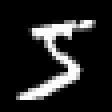

In [4]:
# view training input

index = 1; img = X_trainᵨ[:, :, index]

# use the ' transpose sign to invert the image

colorview(Gray, img')


In [5]:
# view training label

y_trainᵨ[index]


5

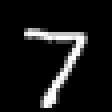

In [6]:
# view testing input

colorview(Gray, X_testᵨ[:, :, index]')


In [7]:
# view testing label

y_testᵨ[index]


7

In [8]:
# flatten input data

X_train = Flux.flatten(X_trainᵨ); @show typeof(X_train), size(X_train)

X_test = Flux.flatten(X_testᵨ); @show typeof(X_test), size(X_test);


(typeof(X_train), size(X_train)) = (Matrix{Float32}, (784, 60000))
(typeof(X_test), size(X_test)) = (Matrix{Float32}, (784, 10000))


&#x1F4CD; Note: Dimensions

> Hint: The digits dataset is a dataset of images. You need to convert them from a 2D array to a 1D one.

Flattening allow the data to strip down from an array of three dimensions `Array{Float32, 3}, (28, 28, 60000)` to a Matrix  `Matrix{Float32}, (784, 60000)`.
The 28x28 tensor array has been replaced to a 784 column vector where each column contains the floating point numbers associated with each image.


In [9]:
# one-hot encode labels

y_train = onehotbatch(y_trainᵨ, 0:9)

y_test = onehotbatch(y_testᵨ, 0:9)


10×10000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  …  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  1     ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

&#x1F4CD; Note: one-hot encoding

As you can see with the above result,  the 1st label appearing in `y_testᵨ` previously viewed is a `seven` label. In the column vector, it appears at the 8th row; (marked by  a ${\color{Green}1}$) because, the column vector starts from 0 and ends at 9 (labels). The dots represent  zeroes ${\color{Salmon}0}$.


As a side note, Julia' indexing is 1-based, like Matlab. Python indexing is 0-based.

<img src=images/one-hot-label.png width='' height='' > </img>

In [10]:
# define model architecture

model = Chain(
    Dense(28 * 28, 32, relu),
    Dense(32, 10),
    softmax
)

Chain(
  Dense(784 => 32, relu),               # 25_120 parameters
  Dense(32 => 10),                      # 330 parameters
  NNlib.softmax,
)                   # Total: 4 arrays, 25_450 parameters, 99.664 KiB.

In [11]:
# define loss function 𝐿

𝐿(x, y) = crossentropy(model(x), y)


𝐿 (generic function with 1 method)

In [12]:
# track parameters called θ

θ = params(model);

In [13]:
# select optimizer

# Let's define the learning rate η \eta
η = Float32(0.01)

opt = ADAM(η)

Adam(0.009999999776482582, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [14]:
# train model

# Let's keep track of the loss history
loss_history = []

epochs = 500

for epoch in 1:epochs
    # train model
    train!(𝐿, θ, [(X_train, y_train)], opt)
    # print report
    train_loss = 𝐿(X_train, y_train)
    push!(loss_history, train_loss)
    # println("Epoch = $epoch : Training Loss = $train_loss")
end

In [15]:
# make predictions

# Let's call the predicted variable ŷ (Latex: \hat{y} or y\hat)

ŷᵨ = model(X_test)

ŷ = onecold(ŷᵨ) .- 1

y = y_testᵨ

mean(ŷ .== y)

0.9624

In [16]:
# display results

check = [ŷ[i] == y[i] for i in 1:length(y)]

index = collect(1:length(y))

check_display = [index ŷ y check]

10000×4 Matrix{Int64}:
     1  7  7  1
     2  2  2  1
     3  1  1  1
     4  0  0  1
     5  4  4  1
     6  1  1  1
     7  4  4  1
     8  9  9  1
     9  4  5  0
    10  9  9  1
    11  0  0  1
    12  6  6  1
    13  9  9  1
     ⋮        
  9989  5  5  1
  9990  6  6  1
  9991  7  7  1
  9992  8  8  1
  9993  9  9  1
  9994  8  0  0
  9995  1  1  1
  9996  2  2  1
  9997  3  3  1
  9998  4  4  1
  9999  5  5  1
 10000  6  6  1

<img src=images/misclassified.png width='30%' height='30%' > </img>

(y[misclass_index], ŷ[misclass_index]) = (5, 4)


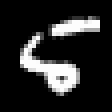

In [17]:
# view misclassifications

misclass_index = 9
img = X_testᵨ[:, :, misclass_index]

@show y[misclass_index], ŷ[misclass_index];

colorview(Gray, img')

In [18]:
# plot learning curve

p_l_curve = plot(1:epochs, loss_history
    , xlabel = "Epochs", ylabel = "Loss"
    , title = "Learning Curve"
    , legend = false, color = :blue
    , linewidth = 2
    , size = (600,600)
)
# save plot
savefig(p_l_curve, "images/ann_learning_curve.svg");

<img src=images/ann_learning_curve.svg width='' height='' > </img>

# References

- [ ] [Is there a way to print loss from Flux.train?](https://stackoverflow.com/questions/73737260/is-there-a-way-to-print-loss-from-flux-train)
- [ ] [The Future of Machine Learning and why it looks a lot like Julia 🤖](https://towardsdatascience.com/the-future-of-machine-learning-and-why-it-looks-a-lot-like-julia-a0e26b51f6a6)